# MountainCar (DQN)

## Постановка задачи
В двумерном мире машине нужно подняться из впадины между двумя горами на вершину правой горы. Машина не может въехать с первой попытки на нужную гору. Нужно обучить агента (в нашем случае — нейронную сеть), который сможет, управляя ею, подняться на правый холм как можно быстрее.
## Problem statement
In a two-dimensional world, a car needs to climb out of a depression between two mountains at the top of the right mountain. The car cannot enter the desired mountain on the first attempt. It is necessary to train an agent (in our case, a neural network) who can, by controlling it, climb the right hill as quickly as possible.

## Среда MountainCar
## MountainCar environment

На каждом шагу агент получает состояние s и награду r в ответ на совершенное им действие a.
Эпизод может завершиться в случае, если автомобиль достиг вершины правого холма или в случае, если агент сделал 200 шагов.
At each step, the agent receives the state s and the reward r in response to the action a performed by him.
The episode can end if the car has reached the top of the right hill or if the agent has taken 200 steps.

![MountainCar](https://www.gymlibrary.dev/_images/mountain_car.gif)

<font size="3">
<p>Эта среда - одна из систем в <a href='https://www.gymlibrary.dev/environments/classic_control'>Classic Control environments</a>.</p>
<p>This environment is one of the systems in <a href='https://www.gymlibrary.dev/environments/classic_control'>Classic Control environments</a>.</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p></p></th>
<th class="head"><p></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Пространство действий</p></td>
<td><p>Discrete(3)</p></td>
</tr>
<tr class="row-odd"><td><p>Размер вектора состояния</p></td>
<td><p>(2,)</p></td>
</tr>
<tr class="row-even"><td><p>Верхние границы</p></td>
<td><p>[0.6 0.07]</p></td>
</tr>
<tr class="row-odd"><td><p>Нижние границы</p></td>
<td><p>[-1.2 -0.07]</p></td>
</tr>
<tr class="row-even"><td><p>Импорт</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">gym.make(&quot;MountainCar-v0&quot;)</span></code></p></td>
</tr>
</tbody>
</table>
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p></p></th>
<th class="head"><p></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Action space</p></td>
<td><p>Discrete(3)</p></td>
</tr>
<tr class="row-odd"><td><p>Size of the state vector</p></td>
<td><p>(2,)</p></td>
</tr>
<tr class="row-even"><td><p>Upper bounds</p></td>
<td><p>[0.6 0.07]</p></td>
</tr>
<tr class="row-odd"><td><p>Lower bounds</p></td>
<td><p>[-1.2 -0.07]</p></td>
</tr>
<tr class="row-even"><td><p>Import</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">gym.make(&quot;MountainCar-v0&quot;)</span></code></p></td>
</tr>
</tbody>
</table>

### Состояния
### States

<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>№</p></th>
<th class="head"><p>Переменная</p></th>
<th class="head"><p>Min</p></th>
<th class="head"><p>Max</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Положение машинки по оси x</p></td>
<td><p>-inf</p></td>
<td><p>inf</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Скорость машинки</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
</tbody>
</table>
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>№</p></th>
<th class="head"><p>Variable</p></th>
<th class="head"><p>Min</p></th>
<th class="head"><p>Max</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>The position of the car on the x axis</p></td>
<td><p>-inf</p></td>
<td><p>inf</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Car speed</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
</tbody>
</table>

### Действия
### Actions

<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>№</p></th>
<th class="head"><p>Действие</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Двинуть машинку налево</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Не двигать машинку</p></td>
</tr>
<tr class="row-odd"><td><p>2</p></td>
<td><p>Двинуть машинку направо</p></td>
</tr>
</tbody>
</table>
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>№</p></th>
<th class="head"><p>Action</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Move car left</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Do not move car</p></td>
</tr>
<tr class="row-odd"><td><p>2</p></td>
<td><p>Move car right</p></td>
</tr>
</tbody>
</table>

Эпизод заканчивается привыполнении одного из следующих условий:

- Termination: Положение машинки больше или равно 0.5 (положение на вершине правого холма)

- Truncation: Эпизод продолжается 200 шагов

The episode ends when one of the following conditions is met:

- Termination: The position of the typewriter is greater than or equal to 0.5 (position at the top of the right hill)

- Truncation: The episode continues 200 steps

## Немного теории
Задача обучения с подкреплением задается: 
* набором из пространства состояний S
* пространства действий A
* степенной показатель для кумулятивной награды $\gamma$ 
* функции награды R.\
Цель заключается в том, чтобы максимизировать награду 
\begin{align}
R = \sum_{t = 0}^{N} \gamma^{t}r_{t}
\end{align}
, где t — номер шага в среде, а N — количество шагов в эпизоде.

## A little theory
The reinforcement learning task is given by: 
* a set from the state space S
* action spaces A
* power exponent for cumulative reward $\gamma$ 
* Reward functions R.\ The
goal is to maximize the reward 
\begin{align}
R = \sum_{t = 0}^{N} \gamma^{t}r_{t}
\end{align}
, where t is the step number in the environment, and N is the number of steps in the episode.

Чтобы решить эту задачу, определим value-функцию V от состояния s как значение максимальной кумулятивной награды при условии, что мы начинаем в состоянии s. Зная такую функцию, мы можем решить задачу просто каждым шагом переходя в s с максимально возможным значением. В большинстве случаев мы не знаем какое действие приведет нас в нужное состояние, поэтому добавим действие a в качестве второго параметра функции.

To solve this problem, we define the value function V of state s as the value of the maximum cumulative reward, provided that we start in state s. Knowing such a function, we can solve the problem simply by passing each step to s with the maximum possible value. In most cases, we do not know which action will bring us to the desired state, so we will add action a as the second parameter of the function.

\begin{align}
V_\pi(s) = E[\sum_{t=0}^{∞}γ^{t}r_t|\pi(s),s_0=s]\\
Q_\pi(s,a) = \sum_{s'}T(s,a,s')(r(s,a,s')+\gamma V_\pi(s')) 
\end{align}

,где T - Оператор эволюции системы, определяющий вероятность перехода $s' \in \mathcal{S}$ из состояния $s \in \mathcal{S}$ при выборе действия $a \in \mathcal{A}$: $s'\gets p(s'|s,a)$)

,where T is the system evolution operator that determines the probability of transition $s'\in \mathcal{S}$ from the state $s\in \mathcal{S}$ when choosing the action $a\in \mathcal{A}$: $s'\gets p(s'|s,a)$)

Полученная функция называется Q-функцией. Она показывает, какую максимально возможную кумулятивную награду мы можем получить, совершив действие a в состоянии s

The resulting function is called a Q-function. It shows what the maximum possible cumulative reward we can get by performing action a in state s

На практике мы не знаем настоящую Q-функцию, но зато можем ее приблизить различными методами. Одним из таких методов является Deep Q Network (DQN). Его идея заключается в том, что мы для каждого из действий приближаем Q-функцию при помощи нейронной сети.
In practice, we do not know the real Q-function, but we can approximate it by various methods. One of these methods is Deep Network (DDN). His idea is that for each of the actions we approximate the Q-function using a neural network.

In [1]:
import gym
import torch.nn as nn
import torch
import numpy as np
import random
import copy
from torch import optim
from torch.nn import functional as F

In [2]:
env = gym.make("MountainCar-v0")

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [24]:
initial_pose = env.reset()[0]

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def create_new_model():
    model = nn.Sequential(
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 3)
    )
    target_model = copy.deepcopy(model)
    
    #Загружаем модель на устройство, определенное в самом начале (GPU или CPU)
    #Loading the model to the device defined at the very beginning (GPU or CPU)
    model.to(device)
    target_model.to(device)
    
    #Сразу зададим оптимизатор, с помощью которого будем обновлять веса модели
    #We will immediately set the optimizer with which we will update the weights of the model
    optimizer = optim.Adam(model.parameters(), lr=0.00003)
    
    return model, target_model, optimizer

In [26]:
gamma = 0.99
def fit(batch, model, target_model, optimizer):
    state, action, reward, next_state, done = batch
    #Загружаем батч на выбранное ранее устройство
    #Download the patch to the previously selected device
    state = torch.tensor(np.array(state)).to(device).float()
    next_state = torch.tensor(np.array(next_state)).to(device).float()
    reward = torch.tensor(np.array(reward)).to(device).float()
    action = torch.tensor(np.array(action)).to(device)
    done = torch.tensor(np.array(done)).to(device)

    # Считаем то, какие значения должна выдавать наша сеть
    # We consider what values our network should give out
    target_q = torch.zeros(reward.size()[0]).float().to(device)
    with torch.no_grad():
        # Выбираем максимальное из значений Q-function для следующего состояния
        # Select the maximum of the Q-function values for the following state
        target_q = target_model(next_state).max(1)[0].view(-1) 
        target_q[done] = 0
    target_q = reward + target_q * gamma

    # Текущее предсказание
    # Current prediction
    q = model(state).gather(1, action.unsqueeze(1))

    loss = F.mse_loss(q, target_q.unsqueeze(1))

    # Очищаем текущие градиенты внутри сети
    # Clearing the current gradients inside the network
    optimizer.zero_grad()
    # Применяем обратное распространение  ошибки
    # We apply the reverse propagation of the error
    loss.backward()
    # Ограничиваем значения градиента. Необходимо, чтобы обновления не были слишком большими
    # Limiting the gradient values. It is necessary that the updates are not too large
    for param in model.parameters():
        param.grad.data.clamp_(-1, 1)
    # Делаем шаг оптимизации
    # Making an optimization step
    optimizer.step()

In [27]:
def select_action(state, epsilon, model):
    if random.random() < epsilon:
        return random.randint(0, 2)
    return (model(torch.tensor(state).to(device).float().unsqueeze(0))[0].max(0)[1]).item()

In [28]:
class Memory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, element):
        """Сохраняет элемент в циклический буфер"""
        """Saves the element to the cyclic buffer"""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = element
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        """Возвращает случайную выборку указанного размера"""
        """Returns a random sample of the specified size"""
        return list(zip(*random.sample(self.memory, batch_size)))
    
    def __len__(self):
        return len(self.memory)

На каждом шаге наш агент получает награду -1, и так происходит до тех пор, пока не завершится эпизод. Такая награда мотивирует агента завершить эпизод как можно быстрее, но в то же время не подсказывает ему как это сделать. Из-за этого единственный способ научиться решать задачу в такой постановке для агента — решить ее много раз, при помощи exploration.

At each step, our agent receives a -1 reward, and this happens until the episode ends. Such a reward motivates the agent to complete the episode as quickly as possible, but at the same time does not tell him how to do it. Because of this, the only way for an agent to learn how to solve a problem in such a formulation is to solve it many times, using exploration.

Мы можем устранить источник проблемы, модифицировав саму задачу, а именно изменив функцию награды, т.е. применив то, что называется reward shaping.

We can eliminate the source of the problem by modifying the task itself, namely by changing the reward function, i.e. by applying what is called reward shaping.

Интуитивно понятно, чтобы заехать на холм нужно разогнаться. Чем больше скорость, тем ближе агент к решению задачи. Можно сообщить ему об этом, например, добавив модуль скорости с некоторым коэффициентом к награде

Intuitively, to drive up the hill, you need to accelerate. The higher the speed, the closer the agent is to solving the problem. You can inform him about this, for example, by adding a speed module with some coefficient to the reward

In [29]:
def get_reward(state): # функция определения наград # reward detection function

    if state[0] >= 0.5:
        return 100
    if state[0] > -0.4:
        return (1+state[1])
    return 0

In [30]:
rewards_by_target_updates = []
#Количество обновлений model между обновлениями target model
#Number of model updates between target model updates
target_update = 1000
#Размер одного батча, который на вход принимает модель
#The size of one batch that the model accepts as input
batch_size = 128
#Количество шагов среды
#Number of environment steps
max_steps = 100001
#Границы коэффициента exploration
#Limits of the exploration coefficient
max_epsilon = 0.5
min_epsilon = 0.1

def train():
      #Создаем модель и буфер
      #Creating a model and buffer
      memory = Memory(5000)
      model, target_model, optimizer = create_new_model()
      state = env.reset()

      for step in range(max_steps):
            #Делаем шаг в среде
            #Taking a step in the environment
            epsilon = max_epsilon - (max_epsilon - min_epsilon)* step / max_steps
            action = select_action(state, epsilon, model)
            new_state, reward, done, _ = env.step(action)
            modified_reward = reward + get_reward(new_state)


            #Запоминаем опыт и, если нужно, перезапускаем среду
            #We remember the experience and, if necessary, restart the environment
            memory.push((state, action, modified_reward, new_state, done))

            if done:
                  state = env.reset()
                  done = False
            else:
                  state = new_state

            #Градиентный спуск
            #Gradient descent
            if step > batch_size:
                 fit(memory.sample(batch_size), model, target_model, optimizer)

            if step % target_update == 0:
                  target_model = copy.deepcopy(model)
      
                  #Exploitation
                  state = env.reset()
                  total_reward = 0
                  while not done:
                        action = select_action(state, 0, target_model)
                        new_state, reward, done, _ = env.step(action)
      
                        modified_reward = reward + get_reward(new_state)

                        total_reward += modified_reward

                  done = False
                  state = env.reset()
                  rewards_by_target_updates.append(total_reward)
                  print(total_reward)
      return rewards_by_target_updates

In [31]:
score = train()

-200.0
-200.0
-86.71190104552079
-59.965477248857496
-200.0
-200.0
-200.0
-200.0
-200.0
-85.7950806420049
-200.0
-200.0
-200.0
-85.76340266175976
-85.80624984133101
-76.93796484284485
-200.0
-200.0
-85.79033088483266
-200.0
-200.0
-200.0
-84.82812977104913
-200.0
-85.78734718216447
-86.74208153120708
-200.0
-84.87333331888658
-85.80094686327811
-83.82389510024223
-200.0
-84.78688273072476
-84.86147036383045
-200.0
-200.0
-200.0
-200.0
-200.0
-200.0
-80.92255672820647
-200.0
-200.0
-200.0
-86.71321891446132
-200.0
-200.0
-86.78230926267133
-83.8216380335216
-83.83730625160388
-85.77678069802641
-200.0
-85.76051984263177
-200.0
-200.0
-78.92537715847584
-84.85809844456526
-200.0
-200.0
-200.0
-200.0
-200.0
-78.92568373547965
-85.7942154188786
-200.0
-85.75993608147837
-83.8461866844591
-200.0
-85.75447691535373
-200.0
-82.89624050958082
-84.85637529020096
-62.964052231165624
-86.71400515711866
-64.96201982655293
-82.89800850376196
-63.965769828175326
-84.86791110474587
-76.93702780493459

In [32]:
print(score)

[-200.0, -200.0, -86.71190104552079, -59.965477248857496, -200.0, -200.0, -200.0, -200.0, -200.0, -85.7950806420049, -200.0, -200.0, -200.0, -85.76340266175976, -85.80624984133101, -76.93796484284485, -200.0, -200.0, -85.79033088483266, -200.0, -200.0, -200.0, -84.82812977104913, -200.0, -85.78734718216447, -86.74208153120708, -200.0, -84.87333331888658, -85.80094686327811, -83.82389510024223, -200.0, -84.78688273072476, -84.86147036383045, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -80.92255672820647, -200.0, -200.0, -200.0, -86.71321891446132, -200.0, -200.0, -86.78230926267133, -83.8216380335216, -83.83730625160388, -85.77678069802641, -200.0, -85.76051984263177, -200.0, -200.0, -78.92537715847584, -84.85809844456526, -200.0, -200.0, -200.0, -200.0, -200.0, -78.92568373547965, -85.7942154188786, -200.0, -85.75993608147837, -83.8461866844591, -200.0, -85.75447691535373, -200.0, -82.89624050958082, -84.85637529020096, -62.964052231165624, -86.71400515711866, -64.96201982655293, -

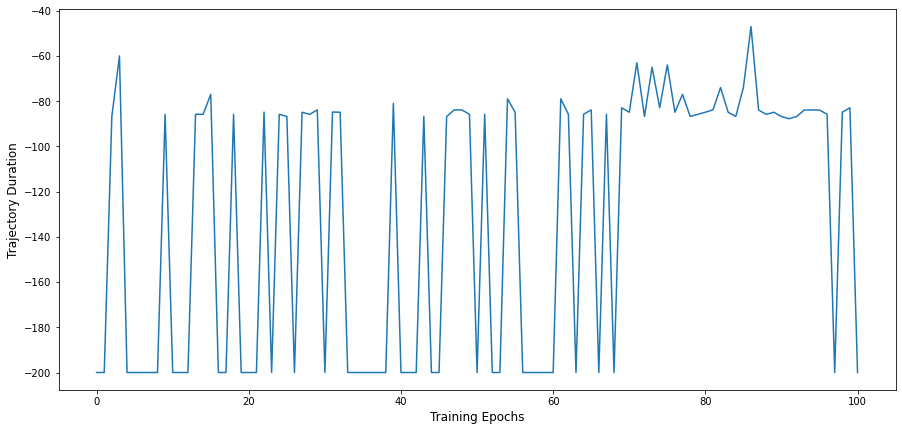

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,7))
plt.ylabel("Trajectory Duration",fontsize=12)
plt.xlabel("Training Epochs",fontsize=12)
# plt.plot(score, color='gray' , linewidth=1)
# plt.plot(avg_score, color='blue', linewidth=3)
plt.plot(np.arange(len(score)),score)

В полученном графике, видно, что наш агент обучился, так как вышел за отметку -100, значит считаем задачу решенной

In the resulting graph, it can be seen that our agent has trained, since he went beyond the -100 mark, so we consider the problem solved